In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def stabilityCorrection(a):
    beta = 5.2
    X = (1-16*a)**(1/4)
    psim = np.zeros(len(a))
    psim[a>0.5] = - beta - (1+beta)*np.log(a[a>0.5])
    psim[(a>=0) & (a <= 0.5)] = -beta*a[(a>=0) & (a <= 0.5)]
    psim[a<0] = 2*np.log((1+X[a<0])/2) + np.log((1+X[a<0]**2)/2)-2 * np.arctan(X[a<0]) + np.pi/2
    return(psim)      

In [3]:
def stabilityCorrection2(a):
    beta = 5.2
    X = (1-16*a)**(1/4)
    psim = np.zeros(len(a))
    psim[a>0.5] = - beta - (1+beta)*np.log(a[a>0.5]) - np.pi/2
    psim[(a>=0) & (a <= 0.5)] = -beta*a[(a>=0) & (a <= 0.5)]
    psim[a<0] = 2*np.log((1+X[a<0])/2) + np.log((1+X[a<0]**2)/2)-2 * np.arctan(X[a<0]) + np.pi/2
    return(psim) 

In [4]:
# Logarithmic (integration) law with piecewise linear-log stability correction (Webb) in terms of Obukhov length (derived from heat flux) (Sharan)
def stabilityCorrection3(a,z0=0.05):
    # z0 = extrapolation from height (default = roughness length ~ .05m)
    beta = 5.2
    L = a*80  # estimate hub = 80m
    psim = np.zeros(len(a))
    psim[a>1] = - beta + beta * z0/L[a>1] - beta * np.log(a[a>1])
    psim[(0 < a) & (a <= 1)] = - beta * (a[(0 < a) & (a <= 1)] - z0/L[(0 < a) & (a <= 1)])
    psim[a<=0] = 0
    return(psim) 

In [5]:
# Logarithmic (integration) law with linear stability correction (Businger; Dyer) in terms of Obukhov length (derived from heat flux) (Sharan)
def stabilityCorrection_linear(a,z0=0.05):
    # z0 = extrapolation from height (default = roughness length ~ .05m)
    beta = 5.2
    L = a*80  # estimate hub = 80m    
    psim = np.zeros(len(a))
    psim[0 < a] = - beta * (a[0 < a] - z0/L[0 < a])
    psim[a<=0] = 0
    return(psim) 

In [6]:
# Logarithmic (integration) law for stable stratification (Rose & Apt): piecewise linear and exponential
# Note: Emeis (3.21) has an error
def stabilityCorrection_linearexp(a, *dropvars):
    aconst = 5
    A = 1
    B = 2/3
    C = 5
    D = 0.35
    psim = np.zeros(len(a))
    psim[(0 < a) & (a <= 0.5)] = - aconst * a[(0 < a) & (a <= 0.5)]
    psim[0.5 < a] = -A * ( a[0.5 < a] + 
                          B*(a[0.5 < a] - C/D) * np.exp(-D * a[0.5 < a]) 
                          + B*C/D )
    psim[a<=0] = 0
    return(psim) 

In [10]:
# Logarithmic (integration) law with for stable stratification (Rose & Apt): piecewise linear, exponential and const.
# Note: Emeis (3.21) has an error
def stabilityCorrection_linearexpconst(a, *dropvars):
    aconst = 5
    A = 1
    B = 2/3
    C = 5
    D = 0.35
    psim = np.zeros(len(a))
    psim[(0 < a) & (a <= 0.5)] = - aconst * a[(0 < a) & (a <= 0.5)]
    psim[(0.5 < a) & (a < 7)] = -A * ( a[(0.5 < a) & (a < 7)] + 
                          B*(a[(0.5 < a) & (a < 7)] - C/D) * np.exp(-D * a[(0.5 < a) & (a < 7)]) 
                          + B*C/D )
    psim[7 <= a] = -16.1046
    psim[a<=0] = 0
    return(psim) 

In [11]:
stabilityCorrection_linearexpconst(np.linspace(7,7,1),0)

array([-16.1046])

/Users/michd/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


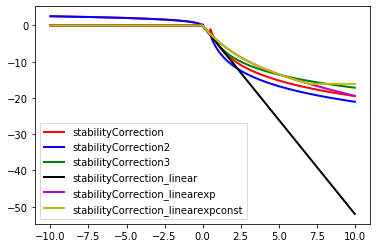

In [13]:
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
line1, = ax.plot(x, stabilityCorrection(x), 'r', linewidth=2, label='stabilityCorrection')
line2, = ax.plot(x, stabilityCorrection2(x), 'b', linewidth=2, label='stabilityCorrection2')
line3, = ax.plot(x, stabilityCorrection3(x), 'g', linewidth=2, label='stabilityCorrection3')
line4, = ax.plot(x, stabilityCorrection_linear(x), 'k', linewidth=2, label='stabilityCorrection_linear')
line4, = ax.plot(x, stabilityCorrection_linearexp(x), 'm', linewidth=2, label='stabilityCorrection_linearexp')
line4, = ax.plot(x, stabilityCorrection_linearexpconst(x), 'y', linewidth=2, label='stabilityCorrection_linearexpconst')
ax.legend(loc='lower left')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


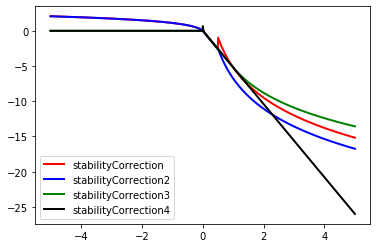

In [58]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots()
line1, = ax.plot(x, stabilityCorrection(x), 'r', linewidth=2, label='stabilityCorrection')
line2, = ax.plot(x, stabilityCorrection2(x), 'b', linewidth=2, label='stabilityCorrection2')
line3, = ax.plot(x, stabilityCorrection3(x), 'g', linewidth=2, label='stabilityCorrection3')
line4, = ax.plot(x, stabilityCorrection4(x), 'k', linewidth=2, label='stabilityCorrection4')
ax.legend(loc='lower left')
plt.show()

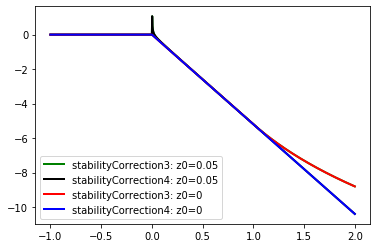

In [81]:
x = np.linspace(-1, 2, 1000)
z0=0.05
fig, ax = plt.subplots()
line3, = ax.plot(x, stabilityCorrection3(x,z0), 'g', linewidth=2, label=f'stabilityCorrection3: z0={z0}')
line4, = ax.plot(x, stabilityCorrection4(x,z0), 'k', linewidth=2, label=f'stabilityCorrection4: z0={z0}')
z0=0
line3, = ax.plot(x, stabilityCorrection3(x,z0), 'r', linewidth=2, label=f'stabilityCorrection3: z0={z0}')
line4, = ax.plot(x, stabilityCorrection4(x,z0), 'b', linewidth=2, label=f'stabilityCorrection4: z0={z0}')
ax.legend(loc='lower left')
plt.show()

In [34]:
stabilityCorrection(0.50001)-stabilityCorrection(0.5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


array([1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852,
       1.69738852, 1.69738852, 1.69738852, 1.69738852, 1.69738852])

In [31]:
x

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


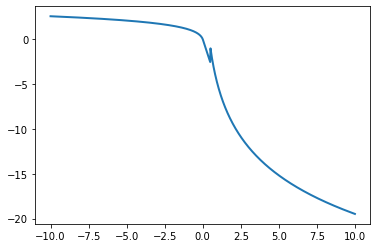

In [19]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, stabilityCorrection(x), linewidth=2)